#Random QuickSort  Time-Distribution

In [1]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt
import math


In [2]:
def randomquicksort(alist,times):
   comp = [0]
   randomquicksorthelper(alist,0,len(alist)-1,comp)
   times.append(comp[0])

In [3]:
def randomquicksorthelper(alist,first,last,comp):
   if first<last:

       r = randompartition(alist,first,last)
       splitpoint = r[0]
       tmp = comp.pop()
       comp.append(tmp+r[1])
    
       randomquicksorthelper(alist,first,splitpoint-1,comp)
       randomquicksorthelper(alist,splitpoint+1,last,comp)

In [4]:
def randompartition(alist,first,last):
  
   indxpiv = random.randint(first,last)
   temp = alist[indxpiv]
   alist[indxpiv] = alist[first]
   alist[first] = temp
   
   pivotvalue = alist[first]
   compspart = 0

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1
           compspart = compspart + 1
       compspart = compspart + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1
           compspart = compspart + 1
       compspart = compspart + 1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark,compspart

In [5]:
def randomquicksorttimedistrib(s,r):
    
    # Create an array of 1 .. n  
    n=s
    runs=r
    x = []
    for i in range(1,n+1):
        x.append(n+1-i)
    
     # Run quicksort for each permutation
    tlist =[]
    for p in range(1,runs+1):
          y = list(x)
          randomquicksort(y,tlist)
          
        
    plt.hist(tlist)
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.show()
    
    print("n:",n)
    print("runs:",runs)
    print("mean:",np.mean(tlist))
    print("stdev:",np.std(tlist))
    print("min:",min(tlist))
    print("max:",max(tlist))
    print("Difference",math.fabs(math.log(16,2)*16 - np.mean(tlist) ))

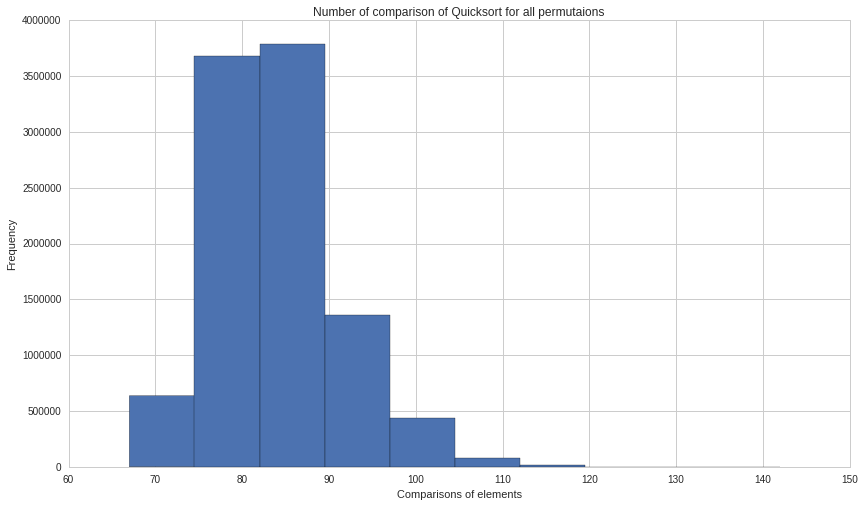

('n:', 16)
('runs:', 10000000)
('mean:', 83.672422800000007)
('stdev:', 7.0956949749858991)
('min:', 67)
('max:', 142)
('Difference', 19.672422800000007)
('Time (seconds):', 711.1265959739685)
('Numer of runs in 5 hours:', 253119488.17421123)


In [6]:
start = time.time()
randomquicksorttimedistrib(16,10000000)
end = time.time()
print("Time (seconds):",end - start)
print("Numer of runs in 5 hours:", (5*60*60/(end-start))*10000000 )
